# <font color ="#0B6FA6">Capítulo da Sociedade de Inteligência Computacional do IEEE UFPB </font>

## Preencha seus dados:

In [ ]:
#@title Preencha os campos abaixo:

nome = 'Laura de Faria' #@param {type:"string"}


## Utilizando API
---

**Descrição:**
\
Tem-se como objetivo realizar a ingestão de dados por meio da API pública da Câmara de Deputados, fazendo uso da linguagem de programação Python e da biblioteca `requests`. Utilizando a [API da Câmara de Deputados](https://dadosabertos.camara.leg.br/swagger/api.html), receba os dados de todos os deputados e transforme em um dataframe.

Depois, realize os seguintes itens:

- Quantidade total de deputados e eventos.
- Plote um gráfico com a quantidade de deputados pela UF.
- Escolha dois eventos, diga qual o ID deles e monte um dataframe por evento com os deputados presentes. (retire as colunas com URL)
- Monte um dataframe contendo o histórico dos deputados Murilo Galdino, Delegado Caveira e Ulisses Guimarães. (retire as colunas com URL)
- Crie um dataframe com os membros do partido com ID "36835" (retire as colunas com URL)
- Plote um gráfico com a quantidade de votações por orgão legislativo ou comissão (utilize o tipoOrgao dele para identificar no gráfico)

Exemplo: [Listagem de deputados](https://dadosabertos.camara.leg.br/api/v2/deputados)

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [4]:
def make_api_request(url, params=None):
    """Make API request with error handling"""
    try:
        response = requests.get(url, params=params, timeout=30)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error making request to {url}: {e}")
        return None

def remove_url_columns(df):
    """Remove columns containing URLs from DataFrame"""
    url_columns = [col for col in df.columns if 'uri' in col.lower() or 'url' in col.lower() or 'foto' in col.lower()]
    return df.drop(columns=url_columns, errors='ignore')

### 1. Adquirir dados de todos os deputados

In [5]:
# Base URL for the Chamber of Deputies API
base_url = "https://dadosabertos.camara.leg.br/api/v2"

# Get all deputies
deputies_url = f"{base_url}/deputados"
deputies_data = make_api_request(deputies_url)

if deputies_data:
    deputies_df = pd.DataFrame(deputies_data['dados'])
    deputies_df = remove_url_columns(deputies_df)
    
    print(f"Total number of deputies: {len(deputies_df)}")
    print("\nDeputies DataFrame structure:")
    print(deputies_df.info())
    print("\nFirst 5 deputies:")
    print(deputies_df.head())
else:
    print("Failed to fetch deputies data")
    deputies_df = pd.DataFrame()

Total number of deputies: 512

Deputies DataFrame structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             512 non-null    int64 
 1   nome           512 non-null    object
 2   siglaPartido   512 non-null    object
 3   siglaUf        512 non-null    object
 4   idLegislatura  512 non-null    int64 
 5   email          512 non-null    object
dtypes: int64(2), object(4)
memory usage: 24.1+ KB
None

First 5 deputies:
       id             nome  siglaPartido siglaUf  idLegislatura  \
0  204379   Acácio Favacho           MDB      AP             57   
1  220714      Adail Filho  REPUBLICANOS      AM             57   
2  221328  Adilson Barroso            PL      SP             57   
3  204560     Adolfo Viana          PSDB      BA             57   
4  204528  Adriana Ventura          NOVO      SP             57   

             

### 2. Adquirir dados de todos os eventos

In [6]:
# Get events
events_url = f"{base_url}/eventos"
events_data = make_api_request(events_url)

if events_data:
    events_df = pd.DataFrame(events_data['dados'])
    events_df = remove_url_columns(events_df)
    
    print(f"Total number of events: {len(events_df)}")
    print("\nEvents DataFrame structure:")
    print(events_df.info())
    print("\nFirst 5 events:")
    print(events_df.head())
    
    # Show some event IDs for selection
    print(f"\nSample Event IDs: {events_df['id'].head(10).tolist()}")
else:
    print("Failed to fetch events data")
    events_df = pd.DataFrame()


Total number of events: 15

Events DataFrame structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              15 non-null     int64 
 1   dataHoraInicio  15 non-null     object
 2   dataHoraFim     10 non-null     object
 3   situacao        15 non-null     object
 4   descricaoTipo   15 non-null     object
 5   descricao       15 non-null     object
 6   localExterno    4 non-null      object
 7   orgaos          15 non-null     object
 8   localCamara     15 non-null     object
dtypes: int64(1), object(8)
memory usage: 1.2+ KB
None

First 5 events:
      id    dataHoraInicio       dataHoraFim           situacao  \
0  77286  2025-09-18T14:30  2025-09-18T15:36          Encerrada   
1  78861  2025-09-18T09:28  2025-09-18T12:03  Encerrada (Final)   
2  78877  2025-09-18T10:20  2025-09-18T11:38  Encerrada (Final)   
3  78911  2025-09-

### 3. Deputados por estado (UF)

Deputies by state:
siglaUf
SP    70
MG    52
RJ    46
BA    39
RS    31
PR    30
PE    25
CE    22
MA    18
GO    17
PA    17
SC    16
PB    12
PI    10
ES    10
AL     9
RN     8
MS     8
MT     8
RO     8
AP     8
AC     8
AM     8
TO     8
RR     8
DF     8
SE     8
Name: count, dtype: int64


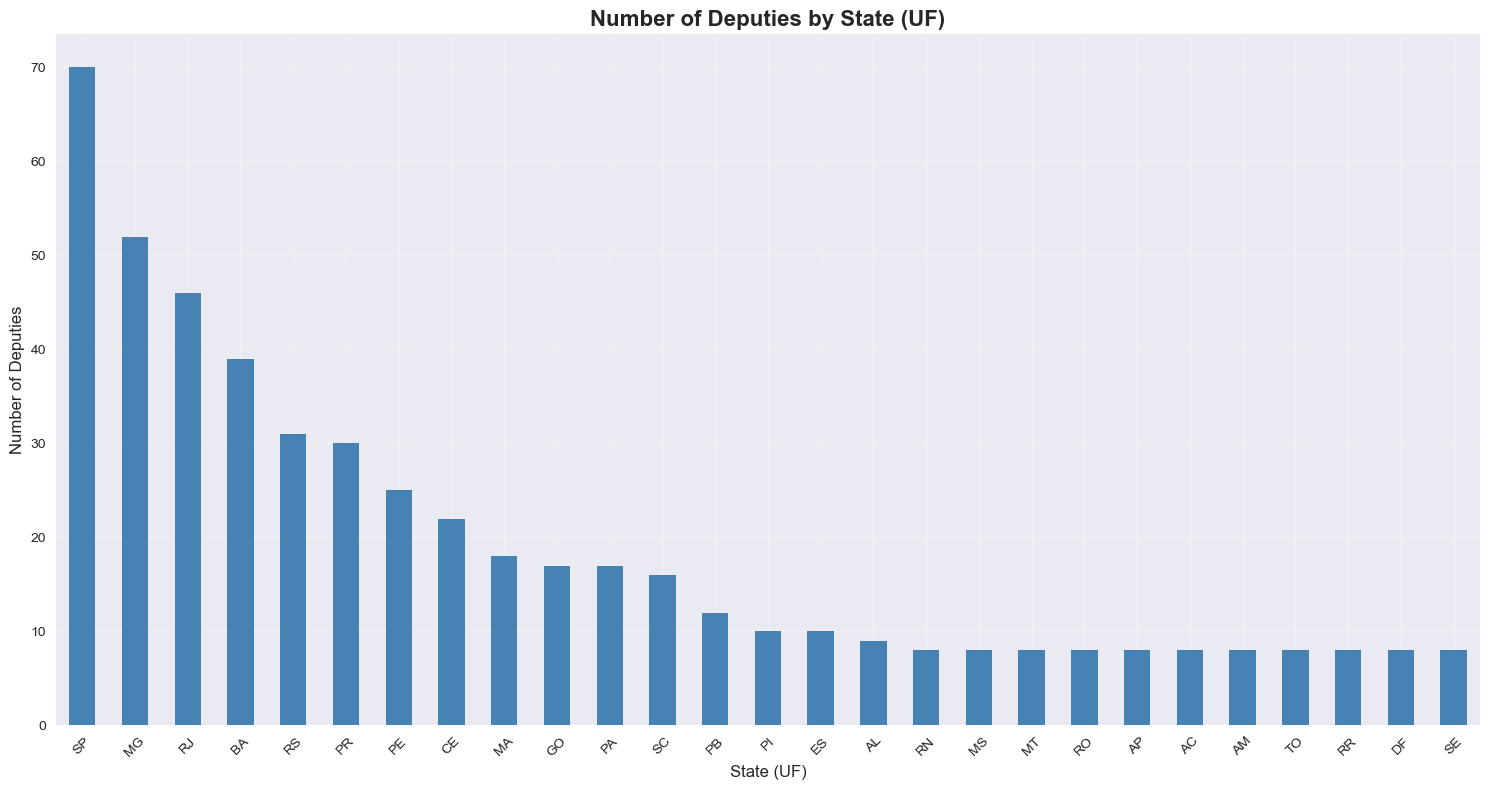

In [7]:
if not deputies_df.empty and 'siglaUf' in deputies_df.columns:
    # Count deputies by state
    uf_counts = deputies_df['siglaUf'].value_counts()
    print("Deputies by state:")
    print(uf_counts)
    
    # Plot deputies by state
    plt.figure(figsize=(15, 8))
    uf_counts.plot(kind='bar', color='steelblue')
    plt.title('Number of Deputies by State (UF)', fontsize=16, fontweight='bold')
    plt.xlabel('State (UF)', fontsize=12)
    plt.ylabel('Number of Deputies', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Cannot analyze deputies by state - missing data")

### 4. Analisar eventos específicos

In [8]:
# Select two events (using first two available event IDs)
if not events_df.empty:
    selected_events = events_df.head(2)
    
    for _, event in selected_events.iterrows():
        event_id = event['id']
        event_description = event.get('descricao', 'No description')
        
        print(f"\n4.{_ + 1} Event ID: {event_id}")
        print(f"Description: {event_description}")
        
        # Get deputies present in this event
        event_deputies_url = f"{base_url}/eventos/{event_id}/deputados"
        event_deputies_data = make_api_request(event_deputies_url)
        
        if event_deputies_data and event_deputies_data.get('dados'):
            event_deputies_df = pd.DataFrame(event_deputies_data['dados'])
            event_deputies_df = remove_url_columns(event_deputies_df)
            
            print(f"Number of deputies present: {len(event_deputies_df)}")
            print("Deputies present in this event:")
            print(event_deputies_df.head())
            
            # Store the dataframe for later use
            globals()[f'event_{event_id}_deputies'] = event_deputies_df
        else:
            print(f"No deputies data found for event {event_id}")


4.1 Event ID: 77286
Description: Homenagem ao Dia do Ortopedista e Dia do Ortopedista Pediátrico
 Homenagem ao Dia do Ortopedista
No deputies data found for event 77286

4.2 Event ID: 78861
Description: Formação de psicanalistas
 Requerimento nº 176/2025 CSAUDE, do Dep. Paulo Folletto (PSB - ES), aditado pelos Requerimentos nº 214/2025 CSAUDE do Dep. Jorge Solla (PT-BA) e n° 220/2025 CSAUDE da Dep. Flávia  Morais (PDT-GO).

Convidados confirmados:

Vera Lúcia Saleme Colnago (participação presencial)
Psicanalista

Wilson Amendoeira (participação presencial)
Psicanalista

Fernanda Costa-Moura (participação presencial)
Psicanalista

Luciano Elia  (participação presencial)
Psicanalista

Christian Dunker (participação presencial)
Psicanalista

Marcus André Vieira (participação presencial)
Psicanalista

Denise Maurano Mello  (participação presencial) 
Representante do Movimento Articulação das Entidades Psicanalíticas Brasileiras

Antônio Geraldo da Silva (participação virtual)
Presidente d

### 5. Dados de histórico dos deputados

In [9]:
# Target deputies for historical analysis
target_deputies = ['Murilo Galdino', 'Delegado Caveira', 'Ulisses Guimarães']

historical_data = {}

for deputy_name in target_deputies:
    print(f"\n5.{target_deputies.index(deputy_name) + 1} Historical data for {deputy_name}:")
    
    # First, find the deputy ID
    if not deputies_df.empty:
        deputy_match = deputies_df[
            deputies_df['nome'].str.contains(deputy_name, case=False, na=False)
        ]
        
        if not deputy_match.empty:
            deputy_id = deputy_match.iloc[0]['id']
            deputy_full_name = deputy_match.iloc[0]['nome']
            
            print(f"Found deputy: {deputy_full_name} (ID: {deputy_id})")
            
            # Get detailed information
            deputy_details_url = f"{base_url}/deputados/{deputy_id}"
            deputy_details = make_api_request(deputy_details_url)
            
            if deputy_details and deputy_details.get('dados'):
                details_df = pd.DataFrame([deputy_details['dados']])
                details_df = remove_url_columns(details_df)
                historical_data[deputy_name] = details_df
                
                print("Historical data:")
                print(details_df.head())
                
                # Get expenses data
                expenses_url = f"{base_url}/deputados/{deputy_id}/despesas"
                expenses_params = {'ano': '2024'}
                expenses_data = make_api_request(expenses_url, expenses_params)
                
                if expenses_data and expenses_data.get('dados'):
                    expenses_df = pd.DataFrame(expenses_data['dados'])
                    expenses_df = remove_url_columns(expenses_df)
                    
                    print(f"\nExpenses data (2024) - {len(expenses_df)} records:")
                    if not expenses_df.empty:
                        print(expenses_df.head())
                        
                        # Show total expenses
                        if 'valorLiquido' in expenses_df.columns:
                            total_expenses = expenses_df['valorLiquido'].sum()
                            print(f"Total expenses in 2024: R$ {total_expenses:,.2f}")
                else:
                    print("No expenses data found")
            else:
                print("Could not retrieve detailed information")
        else:
            print(f"Deputy '{deputy_name}' not found in current legislature")


5.1 Historical data for Murilo Galdino:
Found deputy: Murilo Galdino (ID: 220584)
Historical data:
       id                        nomeCivil  \
0  220584  CÁSSIO MURILO GALDINO DE ARAÚJO   

                                        ultimoStatus          cpf sexo  \
0  {'id': 220584, 'uri': 'https://dadosabertos.ca...  03182571494    M   

                                          redeSocial dataNascimento  \
0  [https://twitter.com/Murilogaldinopb, https://...     1980-07-02   

  dataFalecimento ufNascimento municipioNascimento escolaridade  
0            None           PB            Pocinhos     Superior  

Expenses data (2024) - 15 records:
    ano  mes                                        tipoDespesa  codDocumento  \
0  2024    4  MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...       7715259   
1  2024    2                      COMBUSTÍVEIS E LUBRIFICANTES.       7692997   
2  2024    3                      COMBUSTÍVEIS E LUBRIFICANTES.       7699487   
3  2024    4           

### 6. Partido dos deputados

In [10]:
# Get members of party with ID "36835"
party_id = "36835"
print(f"Analyzing party with ID: {party_id}")

# Get party information
party_url = f"{base_url}/partidos/{party_id}"
party_data = make_api_request(party_url)

if party_data and party_data.get('dados'):
    party_info = party_data['dados']
    print(f"Party: {party_info.get('nome', 'Unknown')} ({party_info.get('sigla', 'Unknown')})")
    
    # Get party members
    party_members_url = f"{base_url}/partidos/{party_id}/membros"
    party_members_data = make_api_request(party_members_url)
    
    if party_members_data and party_members_data.get('dados'):
        party_members_df = pd.DataFrame(party_members_data['dados'])
        party_members_df = remove_url_columns(party_members_df)
        
        print(f"Number of party members: {len(party_members_df)}")
        print("Party members:")
        print(party_members_df.head(10))
        
        # Store for analysis
        globals()[f'party_{party_id}_members'] = party_members_df
    else:
        print("No members data found for this party")
else:
    print("Party information not found")

Analyzing party with ID: 36835
Party: Partido da Social Democracia Brasileira (PSDB)
Number of party members: 15
Party members:
       id                nome siglaPartido siglaUf  idLegislatura  \
0   74262      Carlos Sampaio         PSDB      SP             57   
1   74374     Geraldo Resende         PSDB      MS             57   
2   74646         Aécio Neves         PSDB      MG             57   
3  141411  Dagoberto Nogueira         PSDB      MS             57   
4  141516     Paulo Abi-Ackel         PSDB      MG             57   
5  160161     Marcelo Queiroz         PSDB      RJ             57   
6  178966      Geovania de Sá         PSDB      SC             57   
7  178992         Vitor Lippi         PSDB      SP             57   
8  204358        Beto Pereira         PSDB      MS             57   
9  204404      Lucas Redecker         PSDB      RS             57   

                                 email  
0      dep.carlossampaio@camara.leg.br  
1     dep.geraldoresende@camar

### 7. Análise de votos

In [11]:
# Get voting data
votings_url = f"{base_url}/votacoes"
votings_params = {'ano': '2024', 'itens': '50'}  # Get recent 50 votings
votings_data = make_api_request(votings_url, votings_params)

if votings_data and votings_data.get('dados'):
    votings_df = pd.DataFrame(votings_data['dados'])
    votings_df = remove_url_columns(votings_df)
    
    print(f"Number of votings found: {len(votings_df)}")
    print("Voting data structure:")
    print(votings_df.info())
    
    # Analyze by legislative body type
    if not votings_df.empty:
        # Try to get detailed information about organs
        organs_analysis = {}
        
        # Get unique organ IDs from votings
        if 'idOrgao' in votings_df.columns:
            unique_organs = votings_df['idOrgao'].unique()[:10]  # Limit to first 10 for performance
            
            for organ_id in unique_organs:
                if pd.notna(organ_id):
                    organ_url = f"{base_url}/orgaos/{organ_id}"
                    organ_data = make_api_request(organ_url)
                    
                    if organ_data and organ_data.get('dados'):
                        organ_info = organ_data['dados']
                        organ_type = organ_info.get('tipoOrgao', {}).get('nome', 'Unknown')
                        organ_name = organ_info.get('nome', 'Unknown')
                        
                        organs_analysis[organ_id] = {
                            'name': organ_name,
                            'type': organ_type,
                            'votings_count': len(votings_df[votings_df['idOrgao'] == organ_id])
                        }
            
            # Create summary of votings by organ type
            if organs_analysis:
                organ_types_count = {}
                organ_details = []
                
                for organ_id, info in organs_analysis.items():
                    organ_type = info['type']
                    if organ_type in organ_types_count:
                        organ_types_count[organ_type] += info['votings_count']
                    else:
                        organ_types_count[organ_type] = info['votings_count']
                    
                    organ_details.append({
                        'Organ_ID': organ_id,
                        'Name': info['name'],
                        'Type': organ_type,
                        'Votings_Count': info['votings_count']
                    })
                
                # Create DataFrame for organ details
                organs_df = pd.DataFrame(organ_details)
                print("\nOrgan analysis:")
                print(organs_df)
                
                # Plot votings by organ type
                if organ_types_count:
                    plt.figure(figsize=(12, 8))
                    types = list(organ_types_count.keys())
                    counts = list(organ_types_count.values())
                    
                    bars = plt.bar(types, counts, color='lightcoral')
                    plt.title('Number of Votings by Legislative Body Type', fontsize=16, fontweight='bold')
                    plt.xlabel('Type of Legislative Body', fontsize=12)
                    plt.ylabel('Number of Votings', fontsize=12)
                    plt.xticks(rotation=45, ha='right')
                    
                    # Add value labels on bars
                    for bar, count in zip(bars, counts):
                        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                                str(count), ha='center', va='bottom', fontweight='bold')
                    
                    plt.grid(True, alpha=0.3)
                    plt.tight_layout()
                    plt.show()
                    
                    print("\nSummary of votings by organ type:")
                    for organ_type, count in organ_types_count.items():
                        print(f"{organ_type}: {count} votings")
            else:
                print("Could not retrieve detailed organ information")
        else:
            print("No organ ID information available in voting data")
else:
    print("No voting data found")

Error making request to https://dadosabertos.camara.leg.br/api/v2/votacoes: 400 Client Error: Bad Request for url: https://dadosabertos.camara.leg.br/api/v2/votacoes?ano=2024&itens=50
No voting data found


8.1 Deputies by Political Party:
siglaPartido
PL               88
PT               67
UNIÃO            59
PP               50
PSD              45
REPUBLICANOS     45
MDB              42
PODE             17
PDT              16
PSB              16
PSOL             14
PSDB             13
PCdoB             9
AVANTE            7
SOLIDARIEDADE     5
Name: count, dtype: int64


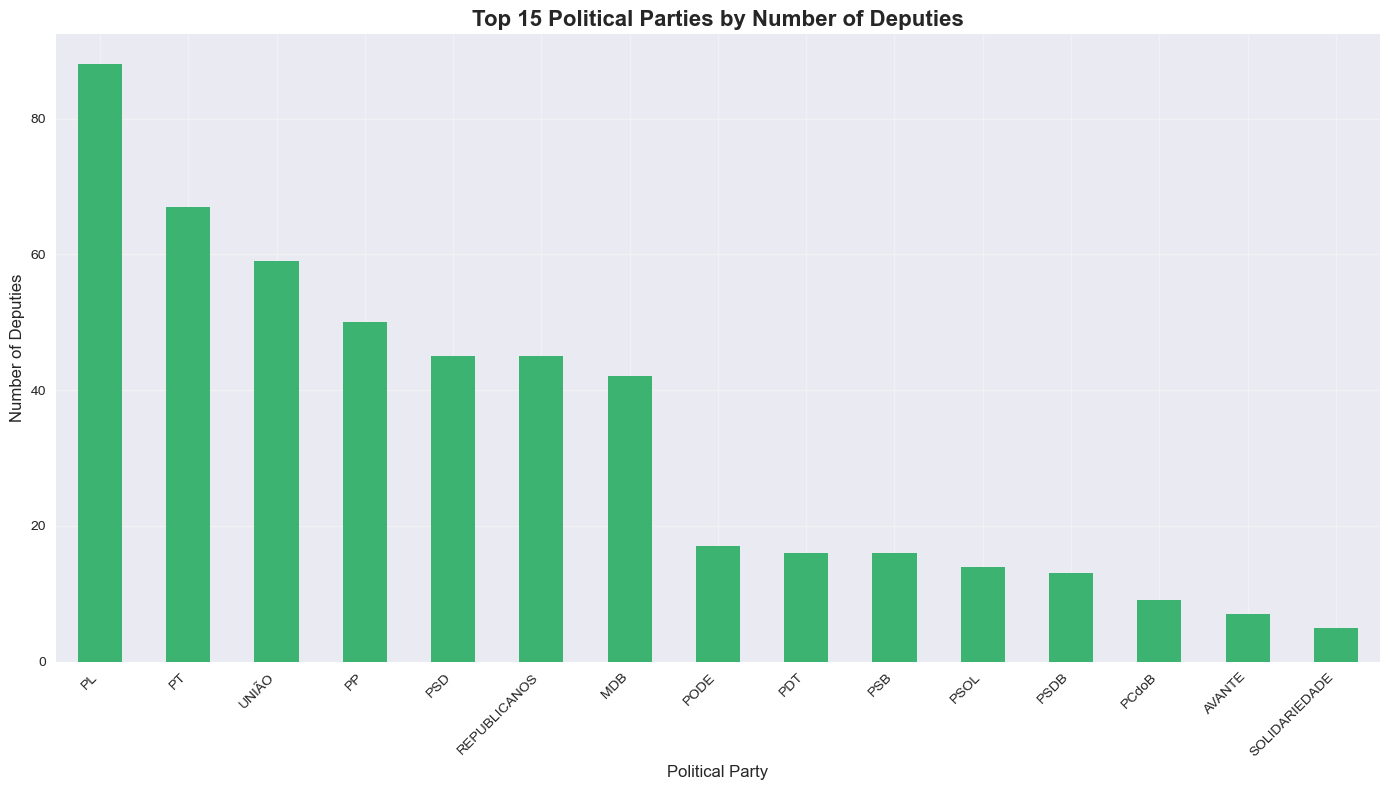

In [12]:
# Analysis of deputy parties distribution
if not deputies_df.empty and 'siglaPartido' in deputies_df.columns:
    print("8.1 Deputies by Political Party:")
    party_counts = deputies_df['siglaPartido'].value_counts().head(15)
    print(party_counts)
    
    # Plot top parties
    plt.figure(figsize=(14, 8))
    party_counts.plot(kind='bar', color='mediumseagreen')
    plt.title('Top 15 Political Parties by Number of Deputies', fontsize=16, fontweight='bold')
    plt.xlabel('Political Party', fontsize=12)
    plt.ylabel('Number of Deputies', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Gender analysis if available
if not deputies_df.empty and 'sexo' in deputies_df.columns:
    print("\n8.2 Deputies by Gender:")
    gender_counts = deputies_df['sexo'].value_counts()
    print(gender_counts)
    
    # Plot gender distribution
    plt.figure(figsize=(8, 8))
    plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
            colors=['lightblue', 'lightpink'])
    plt.title('Gender Distribution of Deputies', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()